# Ordinary Least Squares

## Theory

The simple linear regression model can be written as follows

$$
y_t = \beta_0 + \beta_1 x_{t,1} + \beta_2 x_{t,2} + ... + \beta_p x_{t,k} + u_t
$$
or in vector form:
$$
\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{u}
$$

where $\mathbf{y}$ and $\mathbf{u}$ are $T \times 1$ vectors containing the dependent variables and the errors of the $T$ observations, and $\mathbf{X}$ is an $T \times K$ matrix of independent variables.

$$
{\displaystyle \mathbf {X} ={\begin{bmatrix}X_{11}&X_{12}&\cdots &X_{1K}\\X_{21}&X_{22}&\cdots &X_{2K}\\\vdots &\vdots &\ddots &\vdots \\X_{T1}&X_{T2}&\cdots &X_{TK}\end{bmatrix}},\qquad {\boldsymbol {\beta }}={\begin{bmatrix}\beta _{1}\\\beta _{2}\\\vdots \\\beta _{K}\end{bmatrix}},\qquad \mathbf {y} ={\begin{bmatrix}y_{1}\\y_{2}\\\vdots \\y_{T}\end{bmatrix}}.}
$$


The OLS estimate minimizes the residual sum of squares (RSS):
$$
RSS = \sum_{t=1}^T (y_t - x_t'\beta)^2
$$

Hence, assuming that $(X'X)$ is non-singular (i.e. invertible), the OLS estimate is given by
$$
b = (X'X)^{-1}X'y
$$

From here, we can obtain our predicted values for the dependent variable $\hat{y}$ as
$$
\hat{y} = y - Xb
$$

and the OLS sample residuals
$$
\hat{u} = y - \hat{y} = y - Xb 
$$

To get the standard deviation for our estimator $b_j$, we use the formula
$$
\hat{\sigma_{b_j}} = \hat{\sigma} \sqrt{[(X'X)^{-1}]_{jj}} 
$$
where $jj$ indicates the $j^{th}$ diagonal element of the matrix. Using the full matrix gives us our variance covariance matrix.

The variance of the residuals is given by
$$
\hat{\sigma}^2 = \frac{1}{T-K} \hat{u}'\hat{u}
$$

Using those estimated parameters, we can perform a simple test for $H_0: \beta_j = 0$ using the t-statistic
$$
t = \frac{b_j}{\hat{\sigma_{b_j}}}
$$
and calculate the p-value using the t-distribution with $T-K$ degrees of freedom.
Remember that if the p-value is smaller than the significance level, we reject the null hypothesis.

## Coding OLS using Numpy

In [2]:
import numpy as np

When coding the OLS estimation, the key formula you want to implement is 
$$
b = (X'X)^{-1}X'y
$$

To do this, remember the following methods from Numpy:
- `np.linalg.inv()` to calculate the inverse of a matrix
- `np.dot()` or `@` to perform matrix multiplication
- `np.transpose()` or `.T` to transpose a matrix


In [3]:
# Lets first generate some data to run the regression on
x = np.arange(1000, dtype=float) # Generate 100 data points from 0 to 99

# Specify the relationship between x and y
y = 2 * x + 3

# Add some noise to the data
np.random.seed(0) # Always use the same seed for reproducibility
noise = np.random.normal(0, 100, x.shape)
y += noise

# Add a column of ones to x to account for the intercept in the linear regression
X = np.column_stack((np.ones(x.shape[0]), x)) # Add a column of ones to x

Code the OLS estimator using the generated data from the previous cell:

In [3]:
b_hat = np.linalg.inv(X.T @ X) @ X.T @ y # Calculate the coefficients using the normal equation
print("Coefficients:", b_hat)

Coefficients: [-0.59458846  1.99813597]


Now test the statistical significance of the coefficients using the t-statistic. 

In [4]:
# Calculate the residuals
u_hat = y - X @ b_hat 

# Calculate the variance of the residuals
T = X.shape[0] # Number of observations
K = X.shape[1] # Number of parameters (including intercept)
sigma2_hat = np.sum(u_hat**2) / (T - K)
print("Variance of residuals:", sigma2_hat)

# Calculate the t-statistics for the coefficients
t_stat = b_hat / np.sqrt(sigma2_hat * np.diag(np.linalg.inv(X.T @ X)))

print("t-statistics:", t_stat)

Variance of residuals: 9761.57816952766
t-statistics: [-9.52252451e-02  1.84618059e+02]


To calculate the p-value, you can use the `scipy.stats` library extract values from the CDF of the t-distribution.

In [5]:
import scipy.stats as stats

# Calculate the p-values for the t-statistics
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=T - K)) # Two-tailed test

print("p-values:", p_values)

p-values: [0.92415503 0.        ]


## Writing a function to calculate OLS estimates


Write a function `OLS(X, y)` that takes in the independent variables and dependent variable and returns the OLS estimates, standard errors, t-statistics, and p-values for each coefficient. The function should also return the variance-covariance matrix of the estimates.

In [6]:
def OLS(X,y):
    
    T = X.shape[0]
    K = X.shape[1]
    
    # Obtain the coefficients using the OLS formula (X^T*X)^(-1)*X^T*y
    A1 = np.matmul(X.T,X)
    A = np.linalg.inv(A1)
    B = np.matmul(X.T,y)
    coefficients = np.matmul(A,B)
    
    # Compute fitted values and residuals
    y_hat = np.matmul(X,coefficients)
    residuals = y - y_hat
    
    # Compute the variance of the residuals
    residuals_squared = np.matmul(residuals.T,residuals)
    sigma_hat_squared = residuals_squared / (T - K)

    # Compute the standard errors
    standard_errors = np.sqrt(sigma_hat_squared * np.diag(A))
    standard_errors = standard_errors.T # Just transposing to have same dimensions as coefficients
    
    # Compute the t-statistics
    t_stats = coefficients / standard_errors

    # Compute the p-values for the two sided t-test
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=T-K))
    
    return coefficients, standard_errors, t_stats, p_values

In [7]:
coefficients, standard_errors, t_stats, p_values = OLS(X,y)
print("Coefficients from OLS function:", coefficients)
print("t-statistics from OLS function:", t_stats)
print("p-values from OLS function:", p_values)

Coefficients from OLS function: [-0.59458846  1.99813597]
t-statistics from OLS function: [-9.52252451e-02  1.84618059e+02]
p-values from OLS function: [0.92415503 0.        ]


Compare your results with the `statsmodels` library. You can use the `statsmodels.api` library to perform OLS regression and compare the results with your own implementation.

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the model using statsmodels
model = sm.OLS(y, X).fit() # Fit the model
print(model.summary()) # Print the summary of the regression results

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 3.408e+04
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:30:03   Log-Likelihood:                -6011.0
No. Observations:                1000   AIC:                         1.203e+04
Df Residuals:                     998   BIC:                         1.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5946      6.244     -0.095      0.9

## Plot fitted values and residuals
Illustrate the results using a plot. You can use the `matplotlib` library to create a scatter plot of the data points and the fitted regression line. Add labels and a title to the plot.

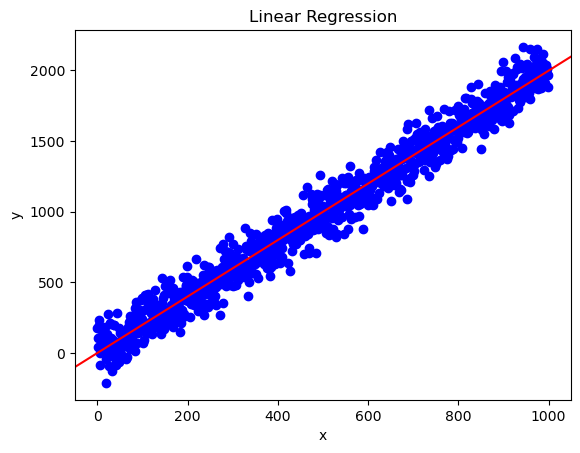

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X[:,1], y, 'bo')  # Plot the data points
plt.axline(xy1=(0, coefficients[0]), slope=coefficients[1], color='r') # Plot the regression line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# Application
Look at the effect of a change in the US Federal Funds Rate on Output.

To run the code below, you need to install the `pandas` and `pandas_datareader` library.


In [10]:
import pandas as pd
import pandas_datareader # has to be installed as pandas-datareader (conda install -c conda-forge pandas-datareader)
import datetime

In [26]:
# download real GDP and the federal funds rate from FRED
indicator_list = ['GDPC1', 'FEDFUNDS']

# specify start and end dates
start = datetime.datetime(1950,1,1)
end = datetime.datetime(2023,1,1)

# download the data
df = pandas_datareader.data.DataReader(indicator_list, 'fred', start, end)
df = df.rename(columns={'GDPC1': 'GDP', 'FEDFUNDS': 'FFR'}) # rename columns
df = df.dropna() # drop missing values

# calculate the growth rates
df['GDP_growth'] = df['GDP'].pct_change(periods=1) * 100 # yoy percentage change in GDP
df['FFR_growth'] = df['FFR'].diff() # percentage change in FFR (note that the FFR is already in percentage points)

# add date column with float values
df['Date'] = df.index.year.astype(int) + (df.index.quarter.astype(int) - 1) / 4 # convert quarter to date
# add columns with ones
df['const'] = 1 # add a column of ones for the intercept

df = df.dropna() # drop missing values
df.head()

,GDP,FFR,GDP_growth,FFR_growth,Date,const
DATE,,,,,,
1954-10-01,2936.852,0.85,1.956964,0.05,1954.75,1
1955-01-01,3020.746,1.39,2.856596,0.54,1955.00,1
1955-04-01,3069.910,1.43,1.627545,0.04,1955.25,1
1955-07-01,3111.379,1.68,1.350821,0.25,1955.50,1
1955-10-01,3130.068,2.24,0.600666,0.56,1955.75,1


In [27]:
# extract numpy matrix
X = df[['const', 'FFR_growth']].to_numpy()
y = df['GDP_growth'].to_numpy()

Run the OLS and evaluate:

In [28]:
coefficients, standard_errors, t_stats, p_values = OLS(X,y)
print("Coefficients from OLS function:", coefficients)
print("t-statistics from OLS function:", t_stats)
print("p-values from OLS function:", p_values)

Coefficients from OLS function: [0.75487788 0.19835994]
t-statistics from OLS function: [11.61101964  3.34718889]
p-values from OLS function: [0.         0.00093151]


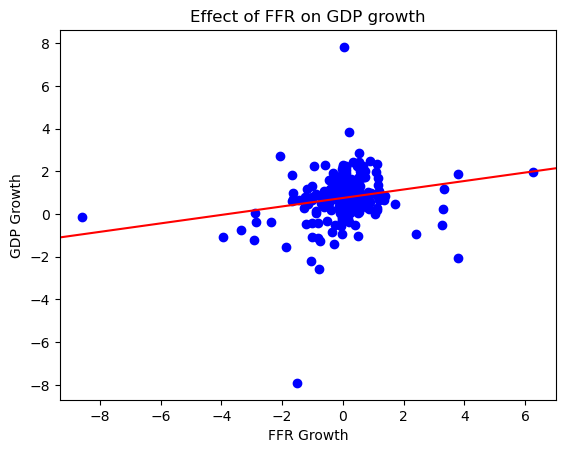

In [29]:
plt.figure()
plt.plot(X[:,1], y, 'bo')  # Plot the data points
plt.axline(xy1=(0, coefficients[0]), slope=coefficients[1], color='r') # Plot the regression line
plt.xlabel('FFR Growth')
plt.ylabel('GDP Growth')
plt.title('Effect of FFR on GDP growth')
plt.show()

In [30]:
# Covid  -> extreme values
selected_GDP = df[(df['GDP_growth'] > 5) | (df['GDP_growth'] < -5)] 
print("Extreme GDP growth values:\n", selected_GDP)

Extreme GDP growth values:
                   GDP   FFR  GDP_growth  FFR_growth     Date  const
DATE                                                               
2020-04-01  19056.617  0.05   -7.908965       -1.50  2020.25      1
2020-07-01  20548.793  0.09    7.830225        0.04  2020.50      1


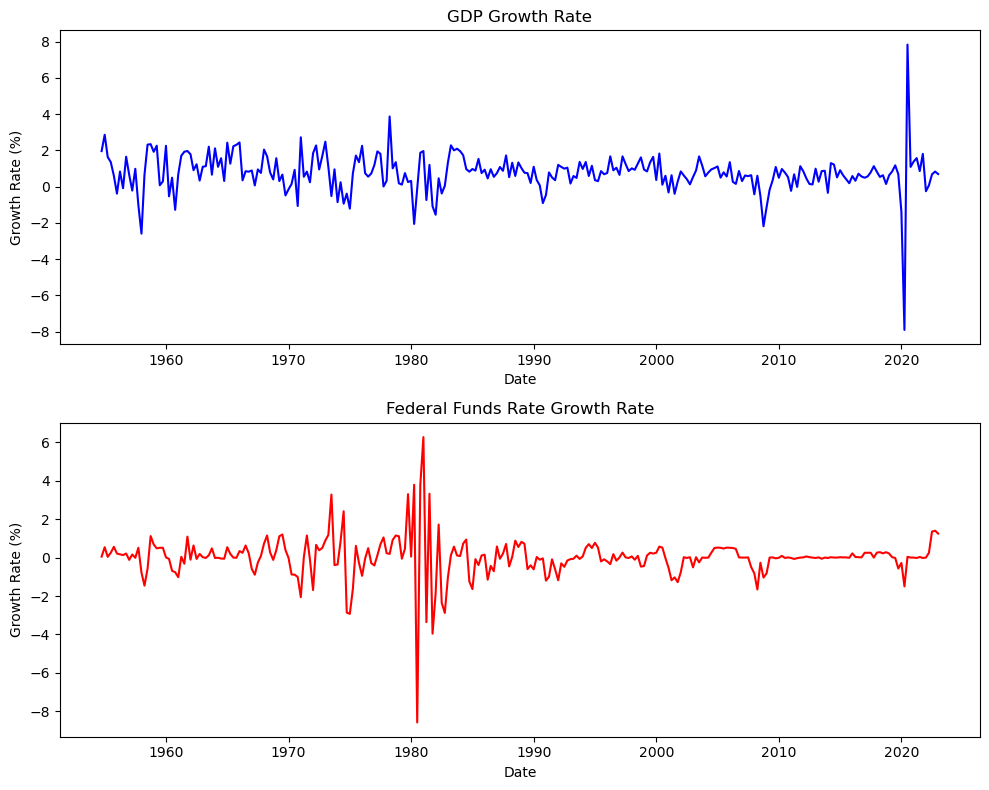

In [16]:
# Good practice: plot the series
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(df.index, df['GDP_growth'], label='GDP Growth', color='blue')
axes[0].set_title('GDP Growth Rate')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Growth Rate (%)')

axes[1].plot(df.index, df['FFR_growth'], label='FFR Growth', color='red')
axes[1].set_title('Federal Funds Rate Growth Rate')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Growth Rate (%)')

plt.tight_layout()

In [17]:
# Different sample: 1990 to 2018

dates = df.Date.to_numpy()
start = np.where(dates == 1990.00)[0][0]
end = np.where(dates == 2018.00)[0][0]

assert dates.shape[0] == X.shape[0], "Dates and X do not have the same number of rows"

X_short = X[start:end+1,:]
y_short = y[start:end+1]


In [18]:
coefficients, standard_errors, t_stats, p_values = OLS(X_short,y_short)
print("Coefficients from OLS function:", coefficients)
print("t-statistics from OLS function:", t_stats)
print("p-values from OLS function:", p_values)

Coefficients from OLS function: [0.64986002 0.38599292]
t-statistics from OLS function: [11.87532584  3.07973881]
p-values from OLS function: [0.         0.00261171]


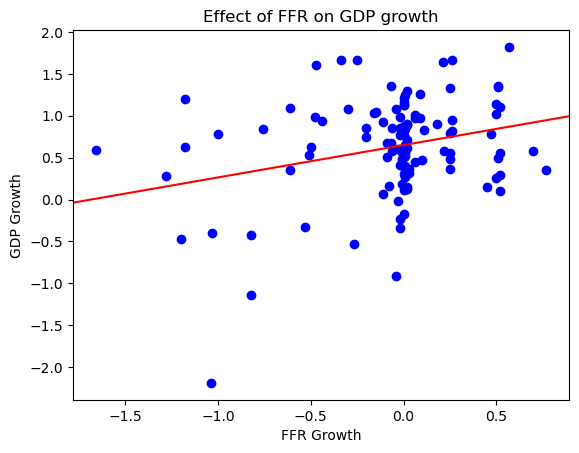

In [19]:
plt.figure()
plt.plot(X_short[:,1], y_short, 'bo')  # Plot the data points
plt.axline(xy1=(0, coefficients[0]), slope=coefficients[1], color='r') # Plot the regression line
plt.xlabel('FFR Growth')
plt.ylabel('GDP Growth')
plt.title('Effect of FFR on GDP growth')
plt.show()

Does this effect make sense intuitively? Why or why not?